In [9]:
%cd C:\Users\alif\Reference Project\dataset\Dashboard Plant IOT\db

C:\Users\alif\Reference Project\dataset\Dashboard Plant IOT\db


# 0. Dataset Understanding

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
os.listdir()

['dataset.xlsx', 'data_iot.db']

In [14]:
# read dataset
data = pd.read_excel("dataset.xlsx")

# overview dataset
data.head()

,timestamp,tds,jarak,kelembapan,suhu
0,1.670848e+09,4.3044,1208,78,30
1,1.670848e+09,4.3044,1208,78,30
2,1.670848e+09,4.3044,1208,78,30
3,1.670848e+09,4.3044,1208,78,30
4,1.670848e+09,4.3044,1208,78,30


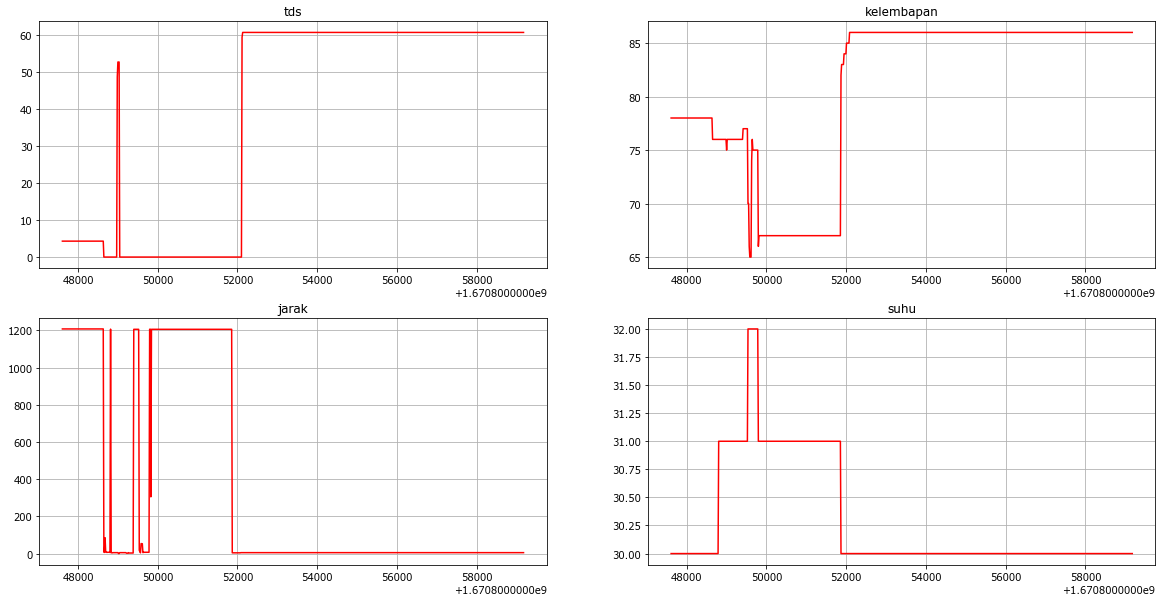

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

x = data.timestamp
count = 1

for col in range(2):
    for row in range(2):
        cols = data.columns[count]
        ax[row, col].set_title(cols)
        ax[row, col].plot(x, data[cols], color = "red")
        ax[row, col].grid(True)
        count += 1
        
plt.show()

# 1. Feature Preprocessing

In [41]:
from sklearn.preprocessing import StandardScaler

![](https://cdn-images-1.medium.com/max/370/1*Nlgc_wq2b-VfdawWX9MLWA.png)

In [42]:
feature = data.iloc[:, 1:]
feature.head()

,tds,jarak,kelembapan,suhu
0,4.3044,1208,78,30
1,4.3044,1208,78,30
2,4.3044,1208,78,30
3,4.3044,1208,78,30
4,4.3044,1208,78,30


In [43]:
# define as np.ndarray
feature = feature.values

# standar scaling applied
scaler = StandardScaler()
scaler.fit(feature)
scaled_feature = scaler.transform(feature)

# 2. Statistic Modeling with ARIMA

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

Seasonal Decompose Additive: ![](https://latex.codecogs.com/svg.image?Y{t}&space;=&space;T{t}&space;.&space;S{t}&space;&plus;&space;C{t}&space;&plus;&space;l{t})

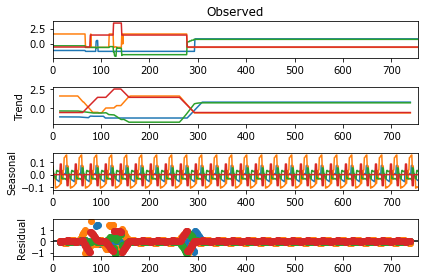

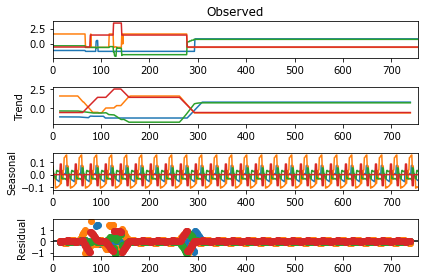

In [65]:
result = seasonal_decompose(scaled_feature, model='additive', period = 31)
result.plot()

## 2.1. ARIMA on TDS

![](https://cdn-images-1.medium.com/max/521/1*QtUXbB5m8mFKTN_PYekWnw.png)

In [67]:
selected_data = scaled_feature[:, 0]

h = sm.tsa.arima.ARIMA(
    endog = selected_data,
    order = (1,1,3)
    )
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  755
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 558.443
Date:                Tue, 13 Dec 2022   AIC                          -1106.886
Time:                        00:56:55   BIC                          -1083.759
Sample:                             0   HQIC                         -1097.977
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6751      0.117      5.786      0.000       0.446       0.904
ma.L1         -0.7034      0.110     -6.418      0.000      -0.918      -0.489
ma.L2          0.0509      0.049      1.031      0.302      -0.046       0.148
ma.L3         -0.1459      0.034     -4.296      0.000      -0.212      -0.079
sigma2         0.0133   7.02e-05    189.707      0.000       0.013       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):           1842993.82
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             7.56
Prob(H) (two-sided):                  0.00   Kurtosis:                       244.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

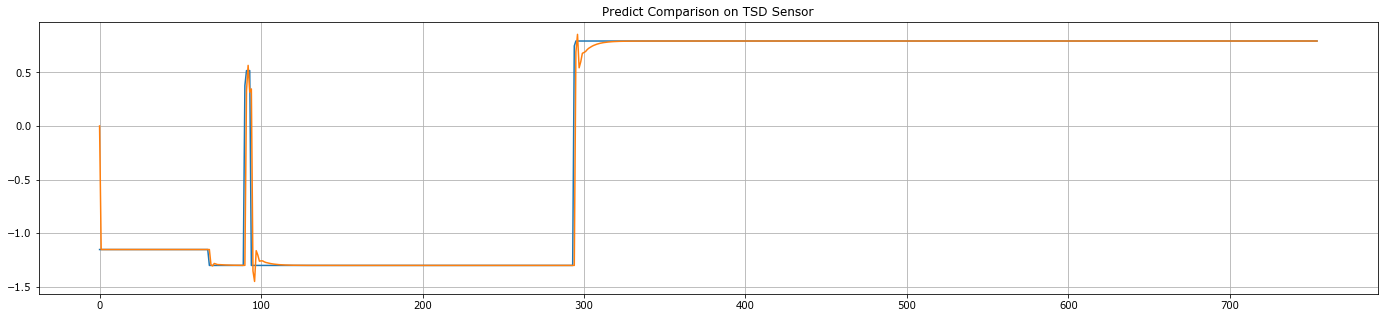

In [70]:
plt.figure(figsize=(24,5))
plt.plot(selected_data)
plt.plot(model.predict())
plt.title("Predict Comparison on TSD Sensor")
plt.grid(True);

## 2.2. ARIMA on Jarak

In [72]:
selected_data = scaled_feature[:, 1]

h = sm.tsa.arima.ARIMA(
    endog = selected_data,
    order = (1,1,3)
    )
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  755
Model:                 ARIMA(1, 1, 3)   Log Likelihood                  58.379
Date:                Tue, 13 Dec 2022   AIC                           -106.759
Time:                        00:58:39   BIC                            -83.632
Sample:                             0   HQIC                           -97.850
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2227      0.528      0.422      0.673      -0.812       1.258
ma.L1         -0.4372      0.530     -0.825      0.409      -1.475       0.601
ma.L2         -0.0381      0.114     -0.334      0.738      -0.262       0.186
ma.L3          0.1202      0.048      2.498      0.012       0.026       0.215
sigma2         0.0501      0.000    113.278      0.000       0.049       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            211211.93
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        84.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

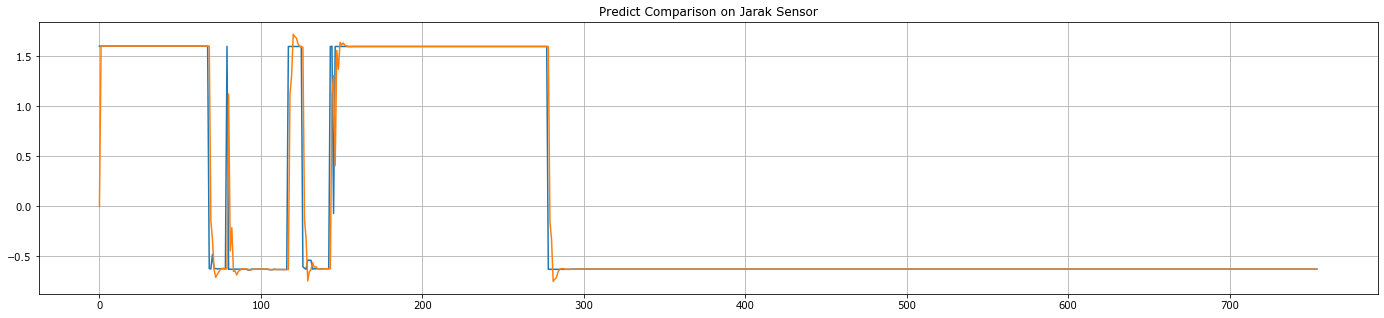

In [73]:
plt.figure(figsize=(24,5))
plt.plot(selected_data)
plt.plot(model.predict())
plt.title("Predict Comparison on Jarak Sensor")
plt.grid(True);

## 2.3. ARIMA on Kelembaban

In [74]:
selected_data = scaled_feature[:, 2]

h = sm.tsa.arima.ARIMA(
    endog = selected_data,
    order = (1,1,3)
    )
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  755
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 625.756
Date:                Tue, 13 Dec 2022   AIC                          -1241.511
Time:                        00:58:53   BIC                          -1218.384
Sample:                             0   HQIC                         -1232.602
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8465      0.174     -4.862      0.000      -1.188      -0.505
ma.L1          0.9087      0.181      5.008      0.000       0.553       1.264
ma.L2          0.0939      0.035      2.704      0.007       0.026       0.162
ma.L3          0.0772      0.023      3.415      0.001       0.033       0.121
sigma2         0.0111   5.85e-05    190.290      0.000       0.011       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1603568.20
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             7.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       228.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

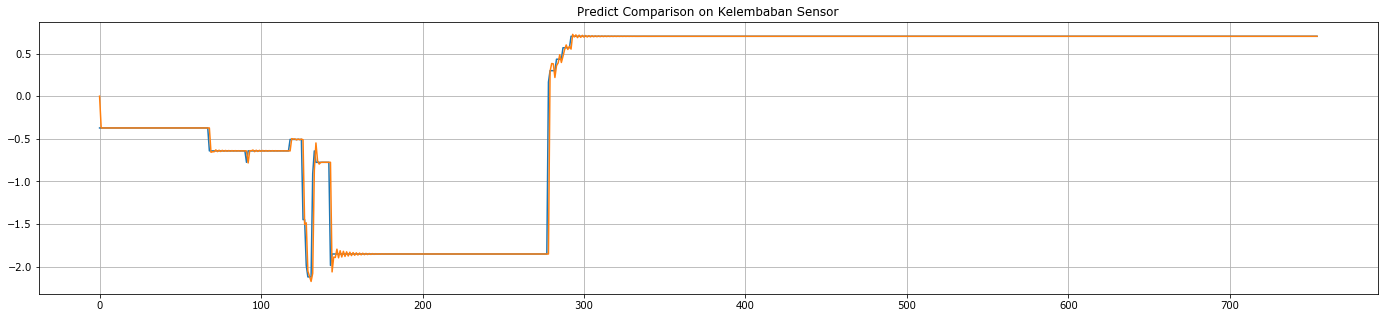

In [75]:
plt.figure(figsize=(24,5))
plt.plot(selected_data)
plt.plot(model.predict())
plt.title("Predict Comparison on Kelembaban Sensor")
plt.grid(True);

## 2.4. ARIMA on Suhu

In [77]:
selected_data = scaled_feature[:, 3]

h = sm.tsa.arima.ARIMA(
    endog = selected_data,
    order = (1,1,3)
    )
model=h.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  755
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 382.388
Date:                Tue, 13 Dec 2022   AIC                           -754.777
Time:                        00:59:19   BIC                           -731.650
Sample:                             0   HQIC                          -745.868
                                - 755                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.596e-07   3.09e-19   5.16e+11      0.000     1.6e-07     1.6e-07
ma.L1      -1.596e-07   4.07e-19  -3.92e+11      0.000    -1.6e-07    -1.6e-07
ma.L2      -1.579e-07   7.61e-13  -2.07e+05      0.000   -1.58e-07   -1.58e-07
ma.L3      -1.579e-07   7.61e-13  -2.07e+05      0.000   -1.58e-07   -1.58e-07
sigma2         0.0212      0.000    188.012      0.000       0.021       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1081055.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       188.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+46. Standard errors may be unstable.
"""

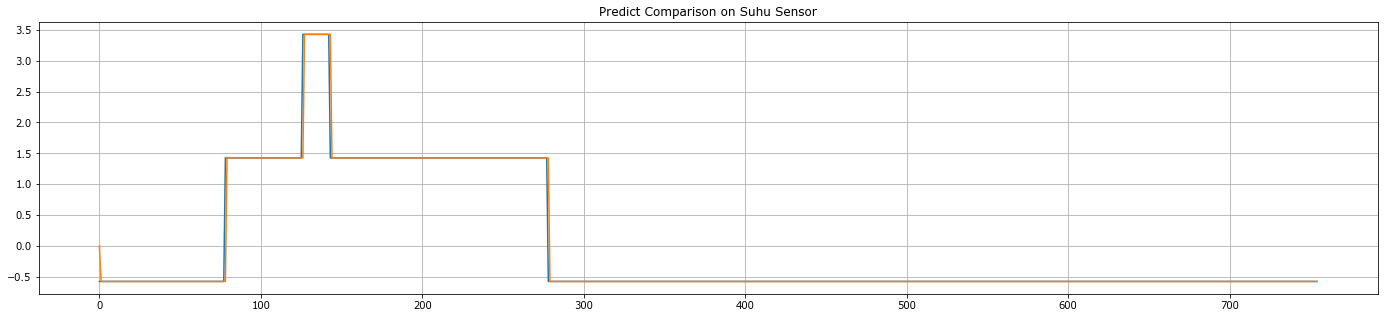

In [78]:
plt.figure(figsize=(24,5))
plt.plot(selected_data)
plt.plot(model.predict())
plt.title("Predict Comparison on Suhu Sensor")
plt.grid(True);